### 데이터 특징 (Feature Description)
- CRIM: 범죄율 (인구당 범죄 발생 비율)
- ZN: 25,000 평방피트 이상 주거 구역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강 인접 여부 (1: 인접, 0: 비인접)
- NOX: 일산화질소 농도 (공기 오염도, 단위: parts per 10 million)
- RM: 주택당 평균 방 개수
- AGE: 1940년 이전에 건축된 비율 (오래된 주택 비율)
- DIS: 직업 중심지와의 거리 (가중 평균)
- RAD: 방사형 고속도로 접근성 지수
- TAX: 재산세율 (10,000달러당)
- PTRATIO: 학생-교사 비율
- B: 흑인 거주 비율 (1000(Bk - 0.63)^2, Bk는 흑인 비율)
- LSTAT: 저소득층 비율 (%)
- MEDV: 주택 가격 (타겟 변수, 단위: 1,000달러)

In [21]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 데이터 불러오기
file_path = 'data/housingdata.csv'
data = pd.read_csv(file_path)

In [3]:
# 1. 결측치 처리
print("Missing Values before")
# 결측치 확인
print(data.isnull().sum())

Missing Values before
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [5]:
# 방법 1: 평균으로 결측치 대체
data_mean_filled = data.fillna(data.mean())
print("Missing Values after")
print(data_mean_filled.isnull().sum())

Missing Values after
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [6]:
# 방법 2: 중앙값으로 결측치 대체
data_median_filled = data.fillna(data.median())
print("Missing Values after")
print(data_median_filled.isnull().sum())

Missing Values after
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [9]:
# 방법 3: KNN Imputer를 사용해 결측치 대체
imputer = KNNImputer(n_neighbors=5)
data_knn_filled = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
print("Missing Values after")
print(data_knn_filled.isnull().sum())

Missing Values after
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [10]:
# 2. 이상치 처리
# IQR을 이용한 이상치 탐지 및 제거
Q1 = data_knn_filled.quantile(0.25)
Q3 = data_knn_filled.quantile(0.75)
IQR = Q3 - Q1

# 이상치 탐지 조건 설정
outlier_condition = (data_knn_filled < (Q1 - 1.5 * IQR)) | (data_knn_filled > (Q3 + 1.5 * IQR))

# 이상치 제거 (상/하위 1% 데이터 제거)
data_cleaned = data_knn_filled[~outlier_condition.any(axis=1)]

print(f"Original Data Size: {data.shape[0]}")
print(f"Cleaned Data Size (after outlier removal): {data_cleaned.shape[0]}")

# 이상치 제거 전후 비교
print("Description before outlier removal:")
print(data_knn_filled.describe())

print("Description after outlier removal:")
print(data_cleaned.describe())

Original Data Size: 506
Cleaned Data Size (after outlier removal): 266
Description before outlier removal:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.711498   11.324111   11.137229    0.070356    0.554695    6.284634   
std      8.717709   23.204710    6.840979    0.251315    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082492    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.260420    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.689388   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
m

# 선형 회귀(Linear Regression)
- 선형 회귀(Linear Regression)는 가장 기본적인 회귀 분석 방법으로, 종속 변수(y)와 하나 이상의 독립 변수(X) 간의 관계를 선형 방정식으로 모델링하는 기법입니다.

# 의사결정나무(Decision Tree)
- **의사결정나무**는 데이터를 **트리 형태**로 분할하여 예측하는 지도 학습 알고리즘입니다.
- 데이터의 특징(Feature)을 기준으로 데이터를 분할해 나가며, 분할이 더 이상 불가능하거나 조건을 만족할 때 예측 값을 도출합니다.

## 특징
- **직관적**: 트리 형태로 데이터가 분할되므로 시각화가 쉽습니다.
- **과적합(Overfitting)**: 깊은 트리를 생성할 경우 학습 데이터에 과적합되기 쉽습니다.
- **비선형 데이터 처리**: 복잡한 비선형 관계를 잘 모델링할 수 있습니다.
- **빠른 학습 속도**: 연산이 빠르고 해석이 용이합니다.

## 랜덤 포레스트(Random Forest)
- **랜덤 포레스트**는 **여러 개의 의사결정나무(Decision Tree)를 앙상블(Ensemble)하여 예측**하는 알고리즘입니다.
- 각 트리는 **무작위로 샘플링**된 데이터와 특징을 사용해 독립적으로 학습됩니다.
- 최종 예측은 개별 트리의 결과를 **평균(회귀)** 또는 **다수결(분류)** 방식으로 결합합니다.

### 랜덤 포레스트의 특징
- **과적합 방지**: 여러 개의 트리를 사용하여 데이터에 과적합되는 것을 방지합니다.
- **안정성**: 노이즈가 많은 데이터에서도 안정적인 성능을 보입니다.
- **높은 예측 정확도**: 개별 트리보다 일반적으로 더 높은 정확도를 제공합니다.
- **병렬 처리**: 각 트리가 독립적으로 학습되므로 병렬 처리가 용이합니다.

## 차이점
| 항목                         | 의사결정나무                             | 랜덤 포레스트                          |
|----------------------------|-----------------------------------------|---------------------------------------|
| **구조**                   | 하나의 트리                              | 다수의 트리 앙상블                     |
| **과적합**                 | 과적합 가능성 큼                         | 과적합 방지                           |
| **학습 속도**              | 빠름                                    | 느림 (다수의 트리 학습 필요)           |
| **예측 정확도**            | 낮음                                    | 높음                                   |
| **노이즈에 대한 민감도**   | 민감                                    | 안정적                                 |
| **해석 가능성**            | 직관적, 시각화 용이                      | 해석이 어렵지만 성능이 뛰어남           |


## 시각화

### 1. Predicted vs Actual (파란 점)
- 각 점은 테스트 데이터에 대한 **실제 주택 가격(Actual Values)**과 **모델이 예측한 가격(Predicted Values)**을 나타냅니다.
  - **X축**: 실제 값 (Actual)
  - **Y축**: 예측 값 (Predicted)
- 점이 **Ideal Line**에 가까울수록 모델의 예측이 실제 값과 일치함을 의미합니다.

### 2. Ideal Line (빨간 점선)
- 이 선은 \( y = x \) 형태의 선으로, **완벽한 예측**을 나타냅니다.
- 예측 값과 실제 값이 정확히 일치하는 경우 이 선 위에 위치합니다.
- 점이 Ideal Line에서 멀어질수록 오차가 크다는 것을 의미합니다.


## 평가 지표

### Mean Absolute Error (MAE)
- 예측값과 실제값의 **절대 오차**의 평균.

### Mean Squared Error (MSE)
- 예측값과 실제값의 **제곱 오차**의 평균.

### R² Score
- 모델이 데이터의 변동성을 얼마나 설명하는지 나타내는 지표.

### 그래프 해석
1. **X축**: 모델 이름
2. **Y축**: 평가 지표 (MAE, MSE, R² Score)
3. 각 바는 해당 모델의 성능을 나타냄.
4. 성능 비교를 통해 최적의 모델을 선택 가능.


Linear Regression Performance:
MAE: 1.8984466177412365
MSE: 6.410392431274859
R2 Score: 0.7138725413113138


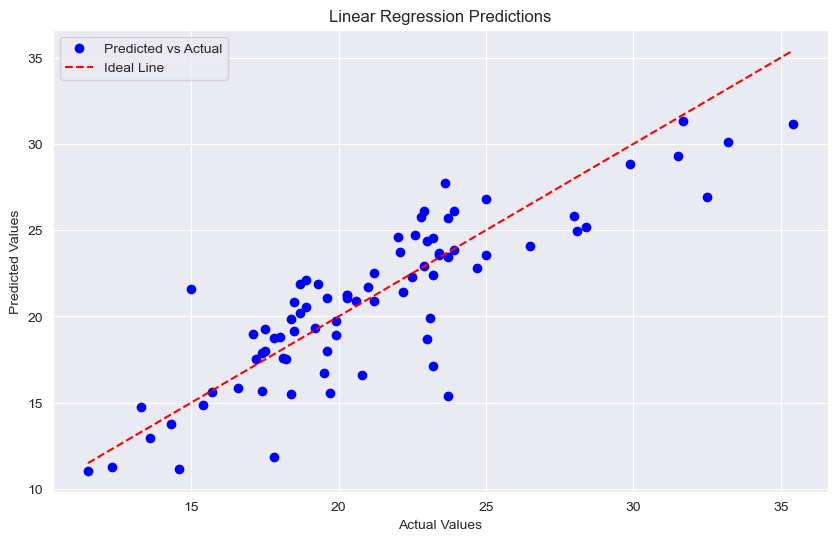

In [15]:
# 3. 선형 회귀 모델링
X = data_cleaned.drop(columns=['MEDV']) # 특성
y = data_cleaned['MEDV'] # 타겟

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 선형 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Linear Regression Predictions')
plt.show()

Decision Tree Performance:
MAE: 2.24875
MSE: 7.660875
R2 Score: 0.6580573313441029
Decision Tree Performance:
MAE: 2.24875
MSE: 7.660875
R2 Score: 0.6580573313441029


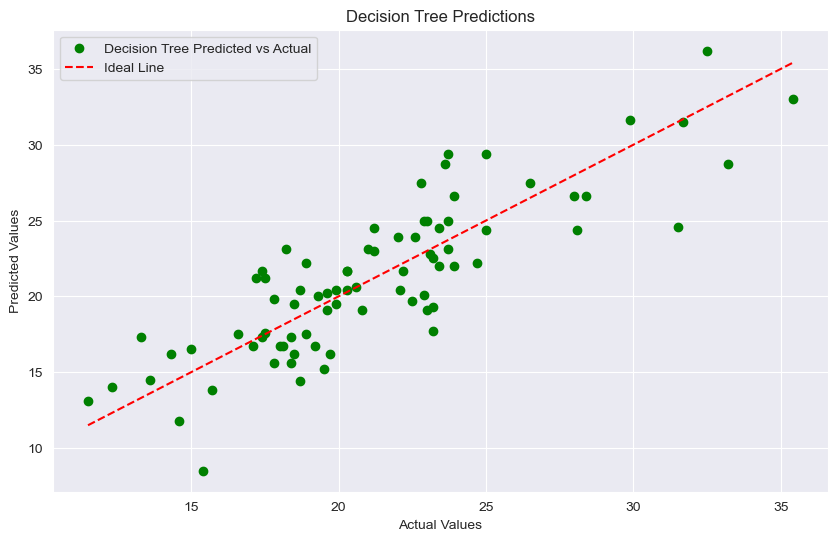

In [19]:
# 의사 결정 나무 모델 초기화 및 학습
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# 예측 및 평가 (의사 결정 나무)
y_pred_tree = decision_tree_model.predict(X_test)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Performance:")
print(f"MAE: {mae_tree}")
print(f"MSE: {mse_tree}")
print(f"R2 Score: {r2_tree}")

print("Decision Tree Performance:")
print(f"MAE: {mae_tree}")
print(f"MSE: {mse_tree}")
print(f"R2 Score: {r2_tree}")

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='green', label='Decision Tree Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Decision Tree Predictions')
plt.show()

Random Forest Performance:
MAE: 1.7038250000000013
MSE: 4.908312825000006
R2 Score: 0.7809177690566069


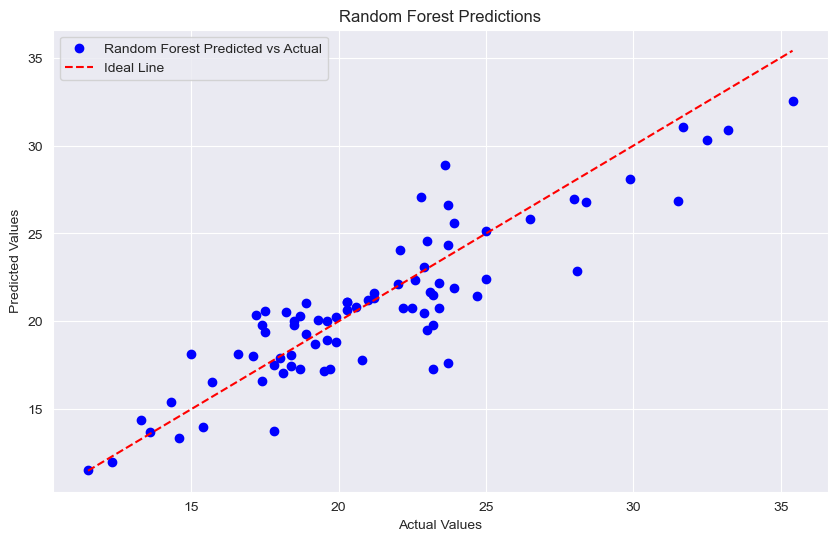

In [22]:
# 랜덤 포레스트 모델 초기화 및 학습
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# 예측 및 평가 (랜덤 포레스트)
y_pred_forest = random_forest_model.predict(X_test)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest Performance:")
print(f"MAE: {mae_forest}")
print(f"MSE: {mse_forest}")
print(f"R2 Score: {r2_forest}")

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_forest, color='blue', label='Random Forest Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Random Forest Predictions')
plt.show()

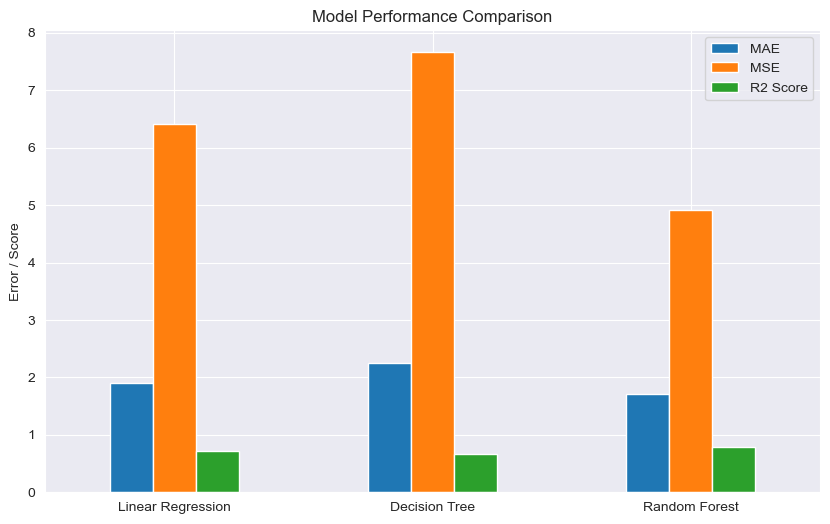

In [23]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = 'data/housingdata.csv'
data = pd.read_csv(file_path)

imputer = KNNImputer(n_neighbors=5)
data_knn_filled = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# 2. 이상치 처리
# IQR을 이용한 이상치 탐지 및 제거
Q1 = data_knn_filled.quantile(0.25)
Q3 = data_knn_filled.quantile(0.75)
IQR = Q3 - Q1

# 이상치 탐지 조건 설정
outlier_condition = (data_knn_filled < (Q1 - 1.5 * IQR)) | (data_knn_filled > (Q3 + 1.5 * IQR))

# 이상치 제거 (상/하위 1% 데이터 제거)
data_cleaned = data_knn_filled[~outlier_condition.any(axis=1)]

# 3. 선형 회귀, 의사 결정 나무, 랜덤 포레스트 모델 구축 및 평가
X = data_cleaned.drop(columns=['MEDV'])  # 특성
y = data_cleaned['MEDV']  # 타겟

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 초기화
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# 모델 학습
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# 예측
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_forest = random_forest_model.predict(X_test)

# 평가
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# 성능 시각화
metrics = pd.DataFrame({
    'MAE': [mae_linear, mae_tree, mae_forest],
    'MSE': [mse_linear, mse_tree, mse_forest],
    'R2 Score': [r2_linear, r2_tree, r2_forest]
}, index=['Linear Regression', 'Decision Tree', 'Random Forest'])

metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Error / Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()